In [57]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# TASK1

### Load the Data

In [75]:
df=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv", parse_dates=['date']).set_index('date')
df_test=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv", parse_dates=['date']).set_index('date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [12]:
df.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### Visualization

#### Exploring Daily Mean Temprature of Delhi

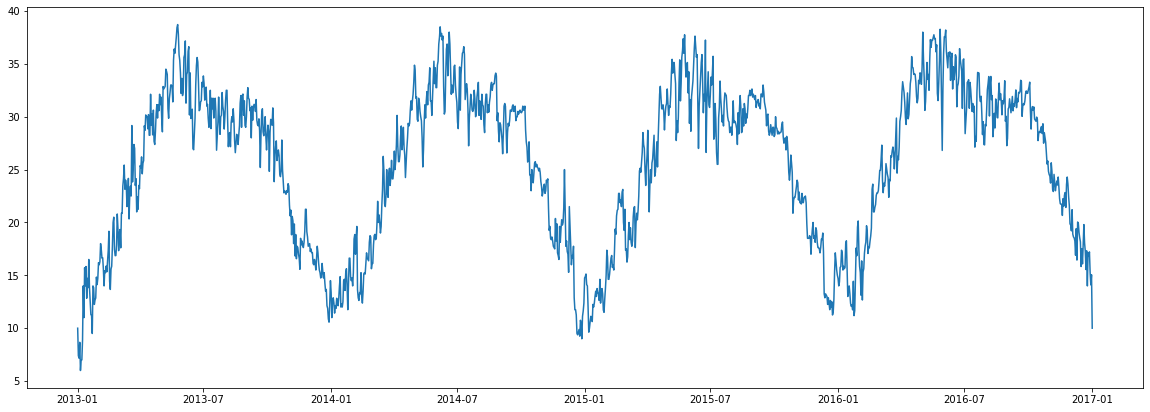

In [19]:
plt.figure(figsize=(20,7))
plt.plot(df.meantemp);

#### From the above Graph we can see that our data has additive seasonality.

### Decomposing the Data - To visualize the Different Components of the Daily Data

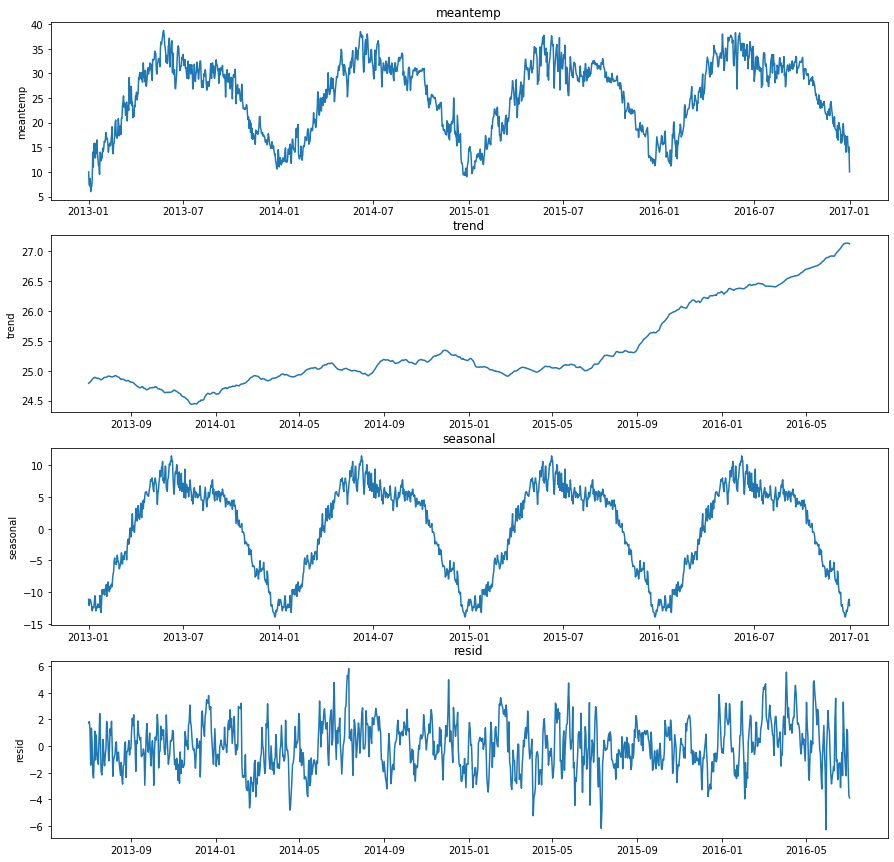

In [21]:
df.sort_index(inplace=True)
decomposition = seasonal_decompose(df['meantemp'], model='additive',period=365)

dt=decomposition.trend
ds=decomposition.seasonal
dr=decomposition.resid

a= [df['meantemp'],dt,ds,dr]

# Trend
fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

### Decomposing the Data - To visualize the Different Components of the Monthly Data

In [22]:
df_m=df['meantemp']
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [23]:
df_monthly = df_m.resample('M').mean()
df_monthly.head()

date
2013-01-31    12.074770
2013-02-28    16.867560
2013-03-31    22.814209
2013-04-30    28.895119
2013-05-31    33.776767
Freq: M, Name: meantemp, dtype: float64

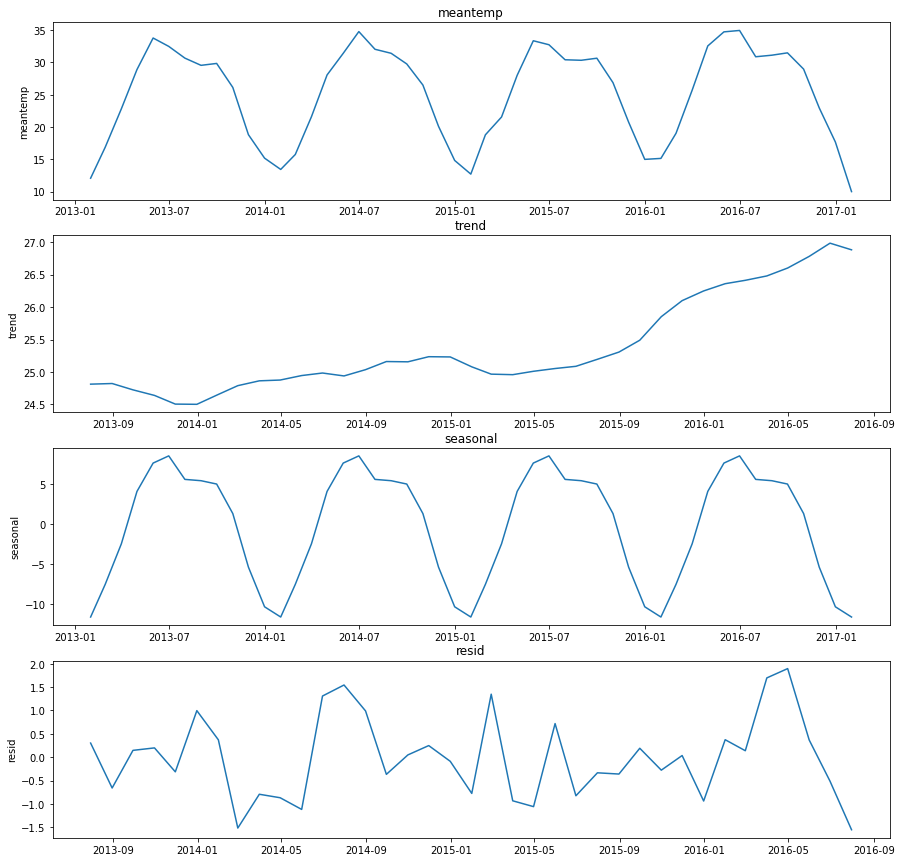

In [24]:
df_monthly.sort_index(inplace=True)
decomposition = seasonal_decompose(df_monthly, model='additive')

dt=decomposition.trend
ds=decomposition.seasonal
dr=decomposition.resid

a= [df_monthly,dt,ds,dr]

# Trend
fig , axes =plt.subplots(4,1, figsize=(15,15))
for i ,ax in zip(a,axes.flatten()):
    ax.plot(i)
    ax.set_ylabel(i.name)
    ax.set_title(i.name)

### Data Smoothing

#### Daily Data

In [51]:
model_d = ExponentialSmoothing(df['meantemp'],trend='add',seasonal='add',seasonal_periods=30).fit()

Text(0.5, 1.0, 'Triple Exponent Smoothing')

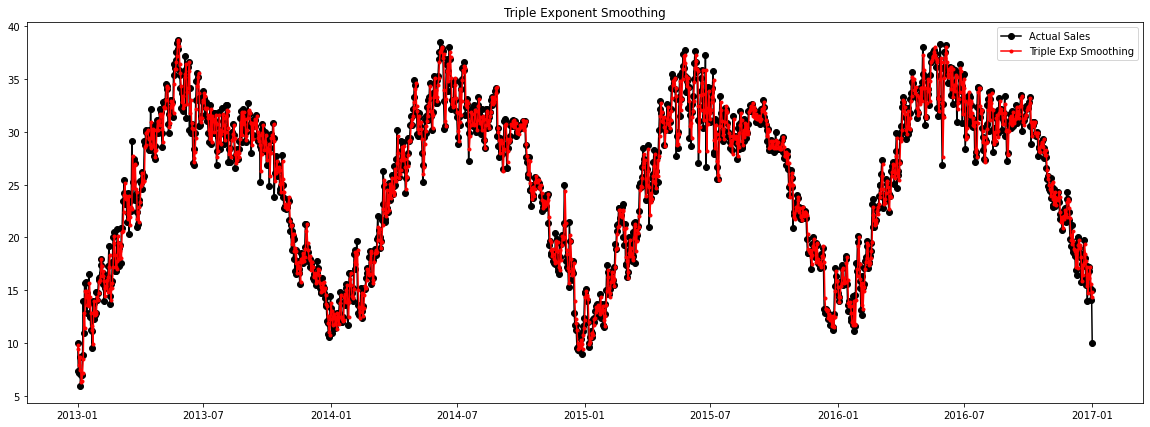

In [52]:
# plot the actual and triple smoothing values
plt.figure(figsize=(20,7))
plt.plot(df['meantemp'], marker='o',color='black',label='Actual Sales')
plt.plot(model_d.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

Text(0.5, 1.0, 'Triple Exponent Smoothing')

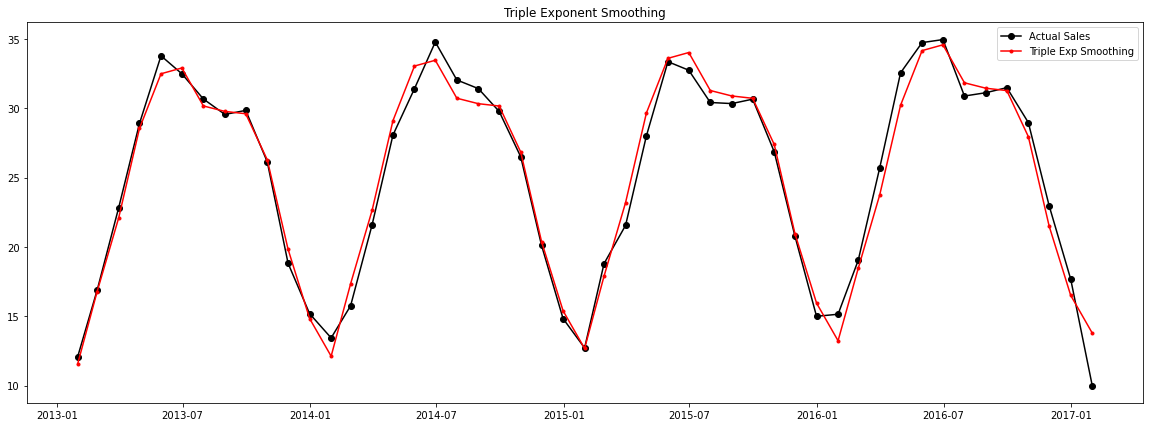

In [54]:
model = ExponentialSmoothing(df_monthly,trend='add',seasonal='add',seasonal_periods=12).fit()
# plot the actual and triple smoothing values
plt.figure(figsize=(20,7))
plt.plot(df_monthly, marker='o',color='black',label='Actual Sales')
plt.plot(model.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()
plt.title('Triple Exponent Smoothing')

# TASK2

### To check if Data is Stationary 

In [56]:
pvalue = adfuller(df['meantemp'])[1]

if(pvalue>0.05):
    print('p-value={}. Data is not stationary'.format(pvalue))
else:
    print('p-value={}. Data is stationary'.format(pvalue))

p-value=0.27741213723016056. Data is not stationary


#### Since our data is not stationary differencing data by one

In [86]:
df['diff'] = diff(df['meantemp'],k_diff=1)#d = 1
df_test['diff'] = diff(df_test['meantemp'],k_diff=1) #d = 1
df_test.dropna(inplace=True)
df.dropna(inplace=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure,diff
date,,,,,
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667
2013-01-06,7.000000,82.800000,1.480000,1018.000000,1.000000
2013-01-07,7.000000,78.600000,6.300000,1020.000000,0.000000


#### Check for stationarity in Differenced Data

In [61]:
pvalue = adfuller(df['diff'])[1]

if(pvalue>0.05):
    print('p-value={}. Data is not stationary'.format(pvalue))
else:
    print('p-value={}. Data is stationary'.format(pvalue))

p-value=2.7648631375945265e-29. Data is stationary


# TASK3

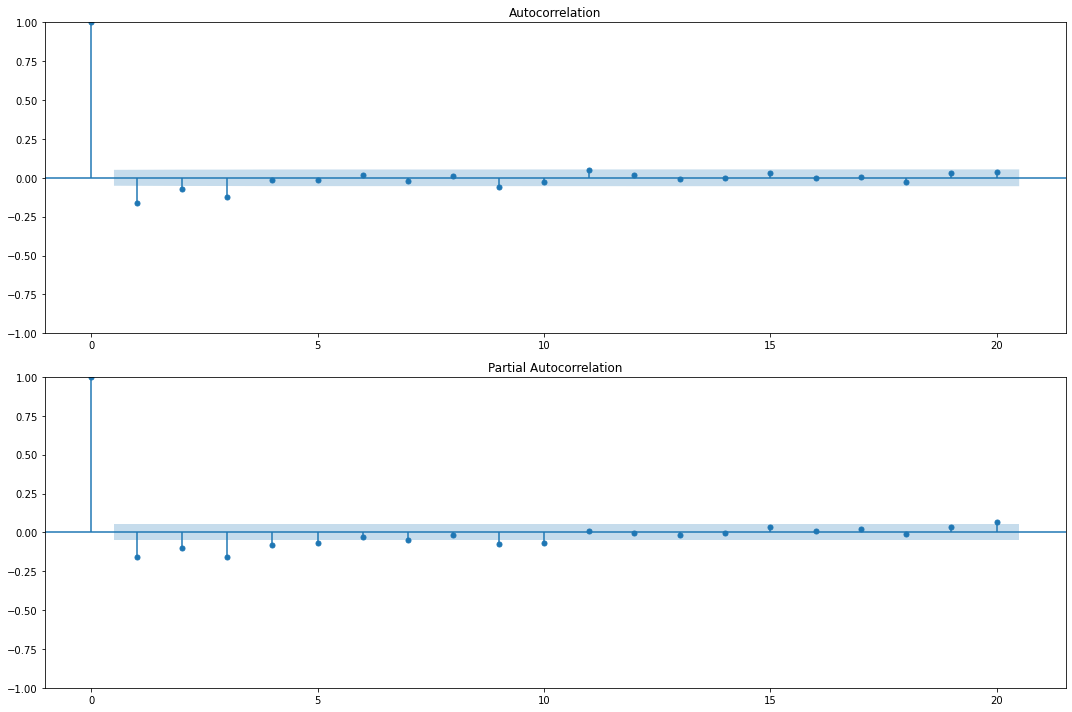

In [65]:
fig = plt.figure(figsize=(15, 10))

# Show ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df['diff'], lags=20, ax=ax1)

# Show PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df['diff'], lags=20, ax=ax2)

plt.tight_layout()

#### From above Correlogram we got the value of P(5) and Q(3) `

### AR Model

In [69]:
ar_m1 = ARIMA(df['diff'],order=(5,0,0)).fit()
print(ar_m1.summary())

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                 1461
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2770.145
Date:                Sun, 25 Dec 2022   AIC                           5554.289
Time:                        21:08:38   BIC                           5591.297
Sample:                    01-02-2013   HQIC                          5568.094
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.026      0.087      0.930      -0.048       0.053
ar.L1         -0.2122      0.021     -9.896      0.000      -0.254      -0.170
ar.L2         -0.1525      0.024     -6.304      0.0

## MA Model

In [70]:
ma_M1 = ARIMA(df['diff'],order=(0,0,3)).fit()

In [72]:
print(ma_M1.summary())

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                 1461
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -2766.246
Date:                Sun, 25 Dec 2022   AIC                           5542.492
Time:                        21:09:01   BIC                           5568.926
Sample:                    01-02-2013   HQIC                          5552.352
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.022      0.119      0.905      -0.040       0.045
ma.L1         -0.2262      0.022    -10.427      0.000      -0.269      -0.184
ma.L2         -0.1242      0.023     -5.350      0.0

## ARMA Model

In [74]:
m1 = ARIMA(df['diff'],order=(5,0,3))
r1 = m1.fit()
print(r1.summary())

                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:                 1461
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -2750.506
Date:                Sun, 25 Dec 2022   AIC                           5521.012
Time:                        21:10:44   BIC                           5573.880
Sample:                    01-02-2013   HQIC                          5540.733
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.043      0.085      0.932      -0.080       0.088
ar.L1          0.7334      0.076      9.644      0.000       0.584       0.882
ar.L2          0.9445      0.120      7.854      0.0

#### Mean Temprature of Delhi

In [79]:
predictions = r1.predict(len(df),len(df)+(len(df_test)-1))
predictions

2017-01-03    0.682707
2017-01-04    0.562588
2017-01-05    0.263139
2017-01-06    0.227860
2017-01-07    0.028024
                ...   
2017-04-22   -0.016526
2017-04-23   -0.017593
2017-04-24   -0.015674
2017-04-25   -0.016644
2017-04-26   -0.014856
Freq: D, Name: predicted_mean, Length: 114, dtype: float64

# TASK4

### Creating Dataframe of Acctual, Predicted and ERROR

In [91]:
DF = pd.DataFrame({'Acctual':df_test['diff'],'Predicted':predictions,'Error': (df_test['diff']-predictions)}).dropna()
DF.head()

,Acctual,Predicted,Error
2017-01-03,-1.388889,0.682707,-2.071596
2017-01-04,1.588889,0.562588,1.026301
2017-01-05,-0.311111,0.263139,-0.574250
2017-01-06,0.929293,0.227860,0.701433
2017-01-07,-4.609848,0.028024,-4.637872


### Ploting Acctual, Predicted and ERROR

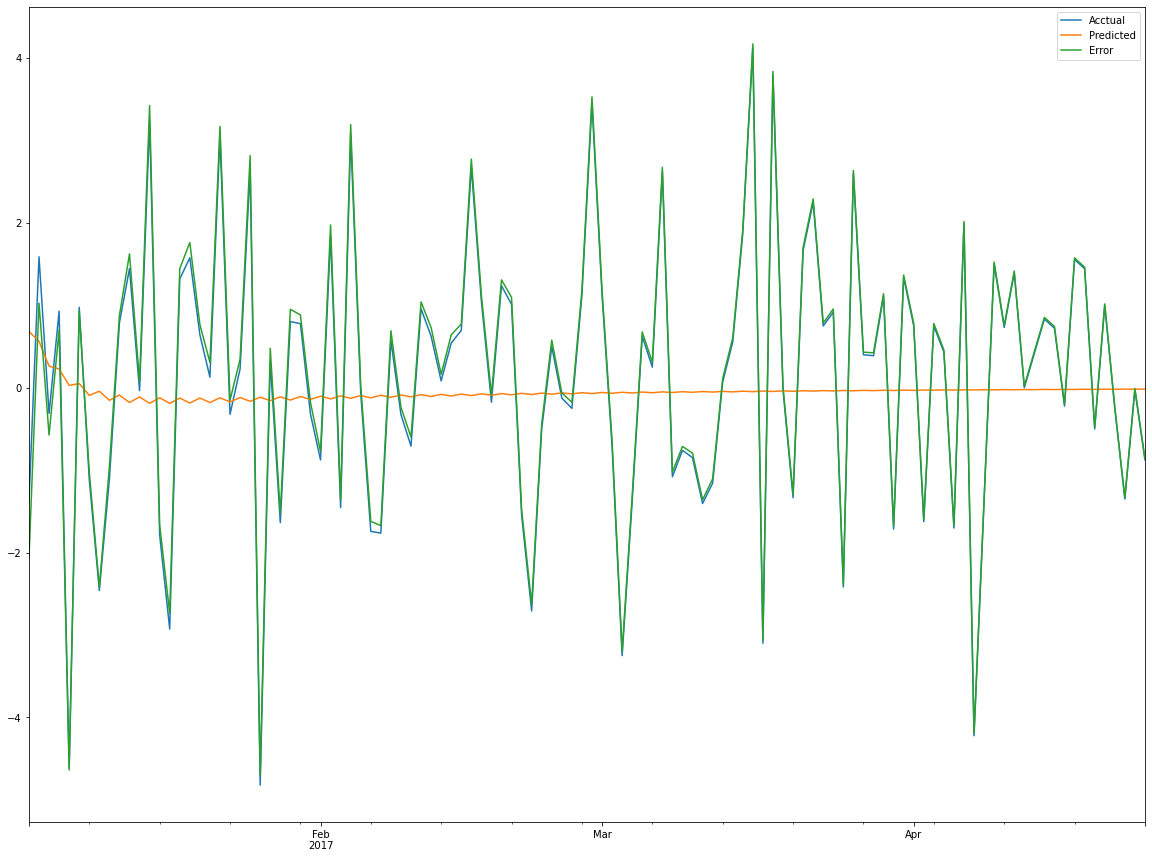

In [100]:
DF.plot(figsize=(20,15));

### Perform the LJung-Box test

In [98]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(r1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Calculate MSE and RMSE of the Model from the test

In [99]:
# MSE
msg = 'ARMA Model. Order=(' + str(5) + ',' + str(3) + ')'
mse1 = mean_squared_error(DF.Acctual, DF.Predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARMA Model. Order=(5,3)
	MSE = 2.8644713663380688
	RMSE = 1.6924749234000689
